In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import urllib
import pylab as pl
import fiona
%pylab inline
from fiona.crs import from_epsg
import shapely

Populating the interactive namespace from numpy and matplotlib


In [217]:
nypd_juris_shp = 'https://data.cityofnewyork.us/api/geospatial/78dh-3ptz?method=export&format=Shapefile'
urllib.request.urlretrieve(nypd_juris_shp, "nypd_juris_shp.zip")
!unzip nypd_juris_shp.zip

Archive:  nypd_juris_shp.zip
  inflating: geo_export_bc1870ee-76a6-4a77-b304-bbeff06adf55.dbf  
  inflating: geo_export_bc1870ee-76a6-4a77-b304-bbeff06adf55.shp  
  inflating: geo_export_bc1870ee-76a6-4a77-b304-bbeff06adf55.shx  
  inflating: geo_export_bc1870ee-76a6-4a77-b304-bbeff06adf55.prj  


In [218]:
nypd_juris_shp = gpd.GeoDataFrame.from_file('./geo_export_bc1870ee-76a6-4a77-b304-bbeff06adf55.shp')

In [47]:
nypd_juris_shp.crs

{'init': 'epsg:4326'}

In [5]:
# pandas dataframe with the number of collisions:
collision_url = 'https://data.cityofnewyork.us/api/views/h9gi-nx95/rows.csv?accessType=DOWNLOAD'

urllib.request.urlretrieve(collision_url, "collisions.csv")

('collisions.csv', <http.client.HTTPMessage at 0x7f387af5de48>)

In [6]:
collisions_df = pd.read_csv('./collisions.csv')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
collisions_df['datetime'] = collisions_df['DATE'] + ' ' + collisions_df['TIME']
collisions_df['datetime'] = pd.to_datetime(collisions_df['datetime'] , infer_datetime_format = True)


In [221]:
collisions_df.columns

Index(['DATE', 'TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE', 'LONGITUDE',
       'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME', 'OFF STREET NAME',
       'NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED',
       'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED',
       'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED',
       'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED',
       'CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2',
       'CONTRIBUTING FACTOR VEHICLE 3', 'CONTRIBUTING FACTOR VEHICLE 4',
       'CONTRIBUTING FACTOR VEHICLE 5', 'UNIQUE KEY', 'VEHICLE TYPE CODE 1',
       'VEHICLE TYPE CODE 2', 'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4',
       'VEHICLE TYPE CODE 5', 'datetime'],
      dtype='object')

In [8]:
col_df_postvz = collisions_df[collisions_df['datetime'].dt.year >= 2014]

In [9]:
col_df_postvz = collisions_df[collisions_df['datetime'].dt.year >= 2014]

In [127]:
vz_features = col_df_postvz[['BOROUGH','datetime' , 'ON STREET NAME' ,'NUMBER OF PERSONS INJURED' ,'NUMBER OF PEDESTRIANS KILLED', \
                            'NUMBER OF PERSONS KILLED' , 'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF CYCLIST INJURED', \
                            'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED', 'LATITUDE', 'LONGITUDE',]]

vz_features['hour'] = vz_features['datetime'].dt.hour

vz_features['weekday'] = vz_features['datetime'].dt.weekday

vz_features['street_name'] = vz_features['ON STREET NAME'].str.lower()
vz_features['street_name'] = vz_features['street_name'].str.strip()
vz_features.drop(['ON STREET NAME'],axis=1,inplace=True)

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

In [12]:
vz_features['lonlat'] = list(zip(vz_features.LONGITUDE ,vz_features.LATITUDE  ))
vz_features['geometry'] = vz_features[['lonlat']].applymap(lambda x:shapely.geometry.Point(x))

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [13]:
crs = {'init': 'epsg:4326'}

vz_gdf = gpd.GeoDataFrame(vz_features, crs=crs)


In [14]:
crs = {'init': 'epsg:2263'}
vz_convert = gpd.GeoDataFrame(vz_gdf, crs=crs)

In [48]:
crs = {'init': 'epsg:2263'}
street_convert = gpd.GeoDataFrame(nyc_streets, crs=crs)

In [49]:
street_accidents = gpd.sjoin(street_convert ,vz_convert)

In [50]:
street_accidents.head()

,precinct,shape_area,shape_leng,geometry,index_right,datetime,NUMBER OF PERSONS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,LATITUDE,LONGITUDE,hour,weekday,street_name,lonlat
0,1.0,4.730176e+07,80586.154615,(POLYGON ((-74.0438776157395 40.69018767637665...,692125,2016-01-27 18:21:00,0.0,0,0.0,0,0,0,0,0,40.716467,-74.013080,18,2,west street,"(-74.0130802, 40.7164669)"
0,1.0,4.730176e+07,80586.154615,(POLYGON ((-74.0438776157395 40.69018767637665...,714973,2015-12-18 19:20:00,0.0,0,0.0,0,0,0,0,0,40.716467,-74.013080,19,4,west street,"(-74.0130802, 40.7164669)"
0,1.0,4.730176e+07,80586.154615,(POLYGON ((-74.0438776157395 40.69018767637665...,214013,2018-02-26 15:05:00,1.0,0,0.0,1,0,0,0,0,40.716564,-74.013336,15,0,NaN,"(-74.013336, 40.716564)"
0,1.0,4.730176e+07,80586.154615,(POLYGON ((-74.0438776157395 40.69018767637665...,103185,2018-08-17 18:51:00,0.0,0,0.0,0,0,0,0,0,40.716800,-74.014800,18,4,NaN,"(-74.0148, 40.7168)"
0,1.0,4.730176e+07,80586.154615,(POLYGON ((-74.0438776157395 40.69018767637665...,592223,2016-07-05 10:40:00,0.0,0,0.0,0,0,0,0,0,40.716800,-74.014800,10,1,NaN,"(-74.0148, 40.7168)"


In [51]:
sum_ct = street_accidents.groupby('precinct').sum()

In [52]:
nypd_juris_shp.set_index('precinct', inplace = True)

In [53]:
ct_acc = nypd_juris_shp.merge(sum_ct,left_index = True, right_index = True)

In [54]:
ct_acc['incidents'] = ct_acc['NUMBER OF PERSONS KILLED'] + ct_acc['NUMBER OF PERSONS INJURED']

In [55]:
ct_acc['incidents_std'] = (( ct_acc['incidents'] - ct_acc['incidents'].mean()) / ct_acc['incidents'].std())

In [22]:
import pysal as ps

In [222]:
import os
import sys
import fiona
path='./nyc_incidents.shp'
ct_acc.to_file(path)

In [223]:
qW_CT = ps.queen_from_shapefile(path)

In [224]:
Wmatrix, ids = qW_CT.full()

In [225]:
qW_CT.transform = 'r'

In [226]:
incidents = ct_acc['incidents']

incidentsLag = ps.lag_spatial(qW_CT, incidents)

In [227]:

cyclists = ct_acc['NUMBER OF CYCLIST INJURED']

cyclistsLag = ps.lag_spatial(qW_CT, cyclists)

cyclistsLagQ10 = ps.Quantiles(cyclistsLag, k=10)
cyclistsLagQ10

                Quantiles                
 
 Lower            Upper             Count
          x[i] <= 133.760               8
133.760 < x[i] <= 158.400               9
158.400 < x[i] <= 180.867               6
180.867 < x[i] <= 219.514               8
219.514 < x[i] <= 266.000               8
266.000 < x[i] <= 337.250               7
337.250 < x[i] <= 365.973               8
365.973 < x[i] <= 408.800               7
408.800 < x[i] <= 465.120               8
465.120 < x[i] <= 875.000               8

In [228]:
incidentsLagQ10 = ps.Quantiles(incidentsLag, k=10)
incidentsLagQ10

                 Quantiles                 
 
 Lower              Upper             Count
           x[i] <= 1504.733               8
1504.733 < x[i] <= 1940.700               8
1940.700 < x[i] <= 2675.267               7
2675.267 < x[i] <= 3129.217               8
3129.217 < x[i] <= 3321.333               8
3321.333 < x[i] <= 3626.640               7
3626.640 < x[i] <= 4022.800               8
4022.800 < x[i] <= 4538.950               7
4538.950 < x[i] <= 4965.400               8
4965.400 < x[i] <= 7193.333               8

In [229]:
LMo_AnnualComplaints = ps.Moran_Local(incidents.values, qW_CT ,permutations=999)

In [230]:
Lmo_cyc = ps.Moran_Local(cyclists.values, qW_CT ,permutations=999)

In [231]:
LMo_AnnualComplaints.Is[0:5], LMo_AnnualComplaints.p_sim[0:5]

(array([ 0.33517833,  0.72890577,  0.77271031,  0.91761063,  0.65331291]),
 array([ 0.023,  0.015,  0.029,  0.073,  0.029]))

In [232]:
sigs = incidents[LMo_AnnualComplaints.p_sim <= 0.01]


In [233]:
sigs2 = incidents[Lmo_cyc.p_sim <= 0.01]


In [234]:
sig2 = Lmo_cyc.p_sim < 0.01
hotspots2 = Lmo_cyc.q==1 * sig2
coldspots2 = Lmo_cyc.q==3 * sig2


In [235]:
sig = LMo_AnnualComplaints.p_sim < 0.01
hotspots = LMo_AnnualComplaints.q==1 * sig
coldspots = LMo_AnnualComplaints.q==3 * sig


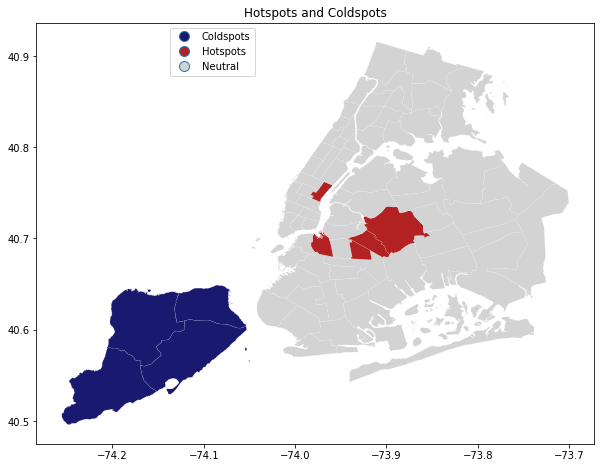

In [302]:
from matplotlib import colors

hcmap = colors.ListedColormap(['midnightblue','firebrick','lightgray'])
hotcold = hotspots2*1 + coldspots2*2 
HotCold_Categories2=[]
for i in range(len(hotcold)):
    if hotcold[i] == 1:
        HotCold_Categories2.append('Hotspots')
    elif hotcold[i] == 2:
        HotCold_Categories2.append('Coldspots')
    
    else:
        HotCold_Categories2.append('Neutral')
        
    
label_list = ['N' ,'H' ,'C']
f = pl.figure(figsize(10,10))
ax = ct_acc.assign(cl=HotCold_Categories2).plot(column='cl', categorical=True, 
        k=2, cmap=hcmap, linewidth=0.1, edgecolor='white',legend=True)

plt.legend(ax=ax,loc = 'upper left')
#ax.set_axis_off()
leg = ax.get_legend()
leg.set_bbox_to_anchor((0.2, 0.2, 0.2, 0.8))

pl.title("Hotspots and Coldspots");
pl.savefig('hcs.png')


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


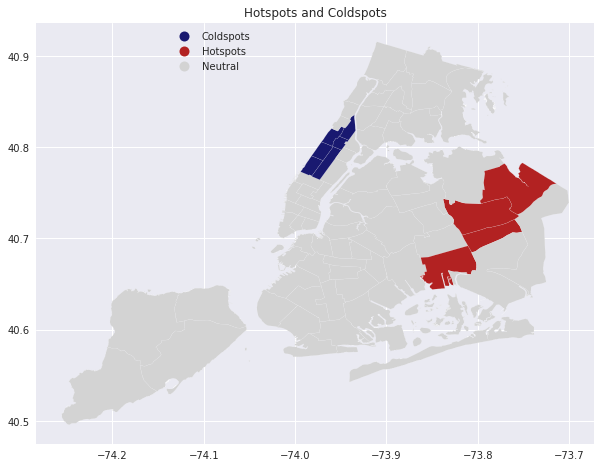

In [240]:
from matplotlib import colors

hcmap = colors.ListedColormap(['midnightblue','firebrick','lightgray'])
hotcold = hotspots*1 + coldspots*2 
HotCold_Categories=[]
for i in range(len(hotcold)):
    if hotcold[i] == 1:
        HotCold_Categories.append('Hotspots')
    elif hotcold[i] == 2:
        HotCold_Categories.append('Coldspots')
    
    else:
        HotCold_Categories.append('Neutral')
        
    
label_list = ['N' ,'H' ,'C']
f = pl.figure(figsize(10,10))
ax = ct_acc.assign(cl=HotCold_Categories).plot(column='cl', categorical=True, 
        k=2, cmap=hcmap, linewidth=0.1, edgecolor='white',legend=True)

plt.legend(ax=ax,loc = 'upper left')
#ax.set_axis_off()
leg = ax.get_legend()
leg.set_bbox_to_anchor((0.2, 0.2, 0.2, 0.8))

pl.title("Hotspots and Coldspots");
pl.savefig('hcs.png')


In [241]:
# bar graph showing total incidents per year in each borough
total_incidents_df1 = vz_features[['BOROUGH','datetime','NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED' ]]


In [242]:
total_incidents_df1['incidents'] = vz_features['NUMBER OF PERSONS INJURED'] + vz_features['NUMBER OF PERSONS KILLED']
total_incidents_df1['year'] = vz_features['datetime'].dt.year

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [243]:
sum_inc1 = total_incidents_df1.groupby(['BOROUGH','year']).sum()

In [244]:
sum_inc1.reset_index(inplace=True)

In [245]:
bronx = sum_inc1[sum_inc1['BOROUGH'] == 'BRONX']['incidents'].values[:-1]
brooklyn = sum_inc1[sum_inc1['BOROUGH'] == 'BROOKLYN']['incidents'].values[:-1]
manhattan = sum_inc1[sum_inc1['BOROUGH'] == 'MANHATTAN']['incidents'].values[:-1]
queens = sum_inc1[sum_inc1['BOROUGH'] == 'QUEENS']['incidents'].values[:-1]
si = sum_inc1[sum_inc1['BOROUGH'] == 'STATEN ISLAND']['incidents'].values[:-1]
years = ['2014' ,'2015' ,'2016' ,'2017' ,'2018']


In [307]:
gdf1 = pd.DataFrame({'BRONX': bronx ,'BROOKLYN':brooklyn, 'MANHATTAN': manhattan,'QUEENS': queens, 'STATEN ISLAND' : si},\
                  index=years)

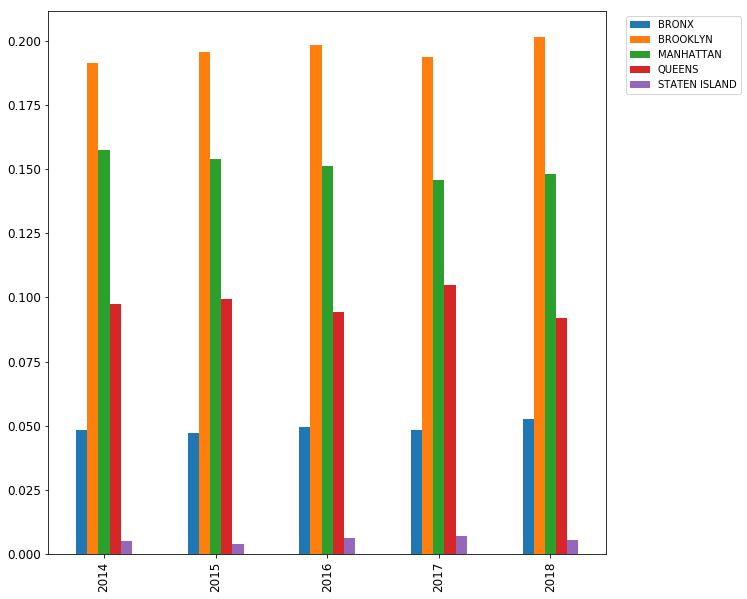

In [309]:
gdf1['sum'] = gdf.iloc[0:6].sum(axis=1)
df_new1 = gdf1.loc[:,"BRONX":"STATEN ISLAND"].div(gdf1["sum"], axis=0)
df_new1 = gdf1.loc[:,"BRONX":"STATEN ISLAND"].div(gdf1["sum"], axis=0)
#df_new1.dropna().plot.bar(rot=0)

df_new1.plot(kind="bar",fontsize=12.0).legend(bbox_to_anchor=(1.25, 1.0))

In [ ]:
df_new1

In [310]:
df_new1

,BRONX,BROOKLYN,MANHATTAN,QUEENS,STATEN ISLAND
2014,0.048374,0.191463,0.157317,0.097561,0.005285
2015,0.047201,0.195641,0.153856,0.099304,0.003998
2016,0.049580,0.198456,0.151314,0.094283,0.006367
2017,0.048339,0.193802,0.145611,0.104982,0.007266
2018,0.052531,0.201589,0.148175,0.091966,0.005739


In [249]:
# bar graph showing total number of cyclists injuries each year in each borough
total_incidents_df = vz_features[['BOROUGH','datetime','NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED' ]]
total_incidents_df['incidents'] = vz_features['NUMBER OF CYCLIST INJURED'] + vz_features['NUMBER OF CYCLIST KILLED']
total_incidents_df['year'] = vz_features['datetime'].dt.year

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [251]:
sum_inc = total_incidents_df.groupby(['BOROUGH','year']).sum()
sum_inc.reset_index(inplace=True)

In [252]:
sum_inc.set_index('year',inplace = True)

In [253]:
bronx = sum_inc[sum_inc['BOROUGH'] == 'BRONX']['incidents'].values[:-1]
brooklyn = sum_inc[sum_inc['BOROUGH'] == 'BROOKLYN']['incidents'].values[:-1]
manhattan = sum_inc[sum_inc['BOROUGH'] == 'MANHATTAN']['incidents'].values[:-1]
queens = sum_inc[sum_inc['BOROUGH'] == 'QUEENS']['incidents'].values[:-1]
si = sum_inc[sum_inc['BOROUGH'] == 'STATEN ISLAND']['incidents'].values[:-1]
years = ['2014' ,'2015' ,'2016' ,'2017' ,'2018']


In [254]:
gdf = pd.DataFrame({'BRONX': bronx ,'BROOKLYN':brooklyn, 'MANHATTAN': manhattan,'QUEENS': queens, 'STATEN ISLAND' : si},\
                  index=years)

In [255]:
gdf['sum'] = gdf.iloc[0:6].sum(axis=1)

In [256]:
df_new = gdf.loc[:,"BRONX":"STATEN ISLAND"].div(gdf["sum"], axis=0)


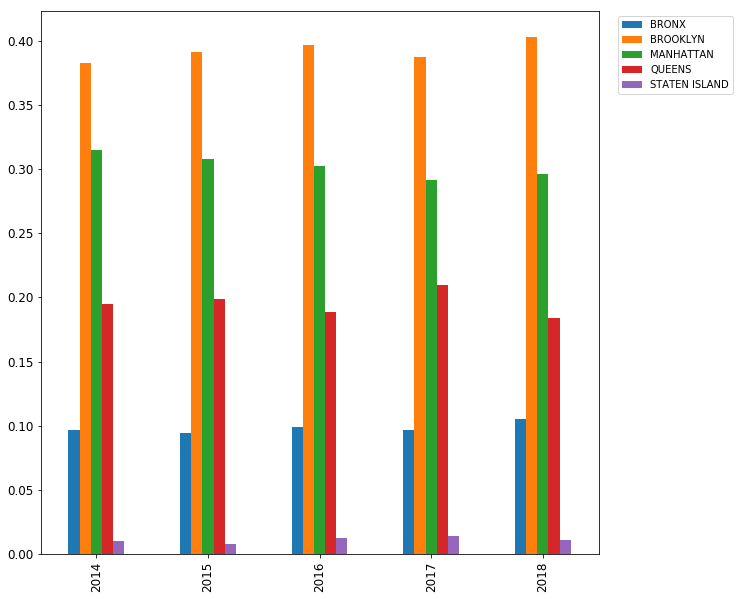

In [270]:
#ax = df_new.plot(kind='bar', legend=False, rot=0)
#patches, labels = ax.get_legend_handles_labels()
#ax.legend(patches, labels, loc='best')
#df_new.plot.bar(rot=0)
import seaborn as sns
sns.reset_orig()
df_new.plot(kind="bar",fontsize=12.0).legend(bbox_to_anchor=(1.25, 1.0))

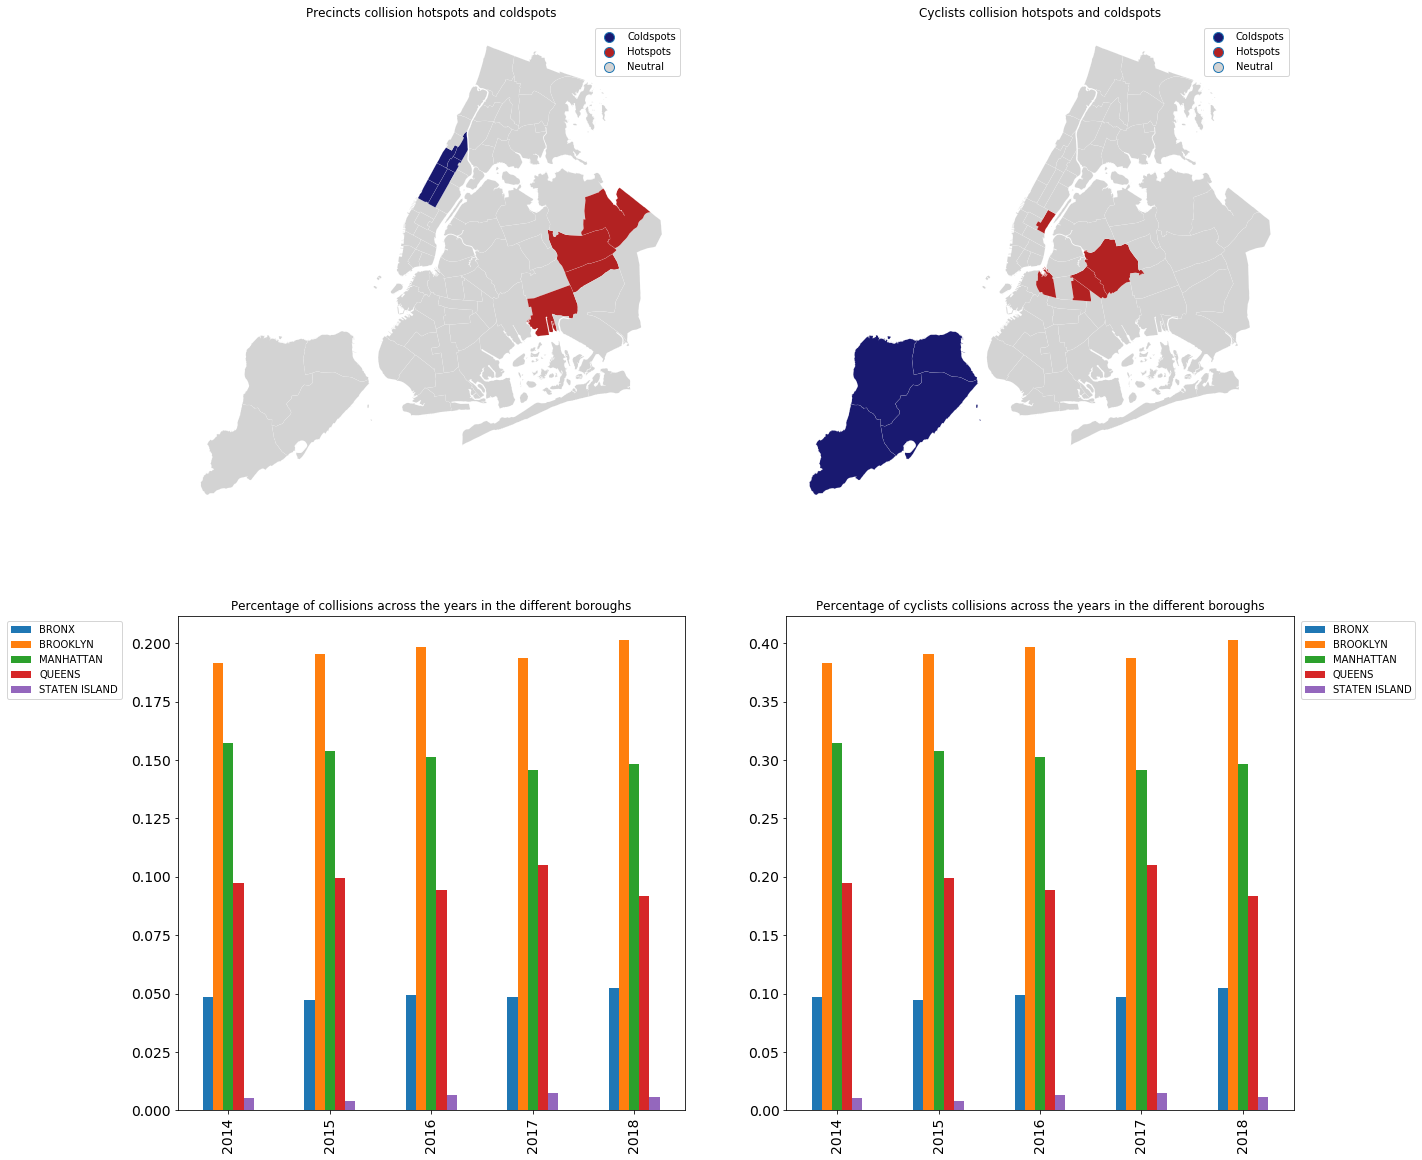

In [311]:
fig = pl.figure(figsize=(20,20))

ax1 = fig.add_subplot(221)
ct_acc.assign(cl=HotCold_Categories).plot(ax=ax1,column='cl', categorical=True, 
        k=2, cmap=hcmap, linewidth=0.1, edgecolor='white',legend=True)

pl.title('Precincts collision hotspots and coldspots')
pl.axis('off')

ax2 = fig.add_subplot(223)
pl.legend(fontsize=12.0)
df_new1.plot(ax=ax2,kind="bar",fontsize=14.0).legend(bbox_to_anchor=(-0.1, 1.0))

pl.title('Percentage of collisions across the years in the different boroughs')
#pl.axis('off')

ax3 = fig.add_subplot(222)
ct_acc.assign( cl=HotCold_Categories2).plot(ax=ax3,column='cl', categorical=True, 
        cmap=hcmap, linewidth=0.1, edgecolor='white',legend=True)
pl.title('Cyclists collision hotspots and coldspots')
pl.axis('off')

ax4 = fig.add_subplot(224)
pl.legend(fontsize=12.0)
df_new.plot(ax=ax4,kind="bar",fontsize=14.0).legend(bbox_to_anchor=(1.25, 1.0),fontsize=10.0)

pl.title('Percentage of cyclists collisions across the years in the different boroughs',fontsize=12.0)
#pl.axis('off')

pl.savefig('./fig1.png')

### Figure Interpretation: 

The first choropleths on the left above show the hotspots and coldspots, ie, the police precints having high incidence(hotspots) and low incidence(coldspots). High collision cluster can be found in the precincts of Queens. There is a cluster of precincts in Manhattan which is a center of low collisions. 

However, the corresponding bar chart shows that the borough which has the highest proportions of collision from 2014-2018 is Brooklyn, followed by Manhattan and Queens. Thus, the collisions in Brooklyn are then more dispersed across the borough than Queens.

With bikesharing companies like Citibike rolling out its services, the number of cyclists collisions have increased. The hotspots in red indicate high collision clusters in Manhattan and Brooklyn which is not surprising. Also, Staten Island borough can be safely regarded as a cold-spot. It accounts for a neglible percentage of collisions involving cyclists.

The above graphs , while they tell us what we already know. Thus, we need to look into the street conditions and its characteristics to better understand what might be causing the acccidents. 